# Three Equations in Three Unknowns
### Summary of Gaussian Elimination Steps:

1. **Initial System:**
   $$
   \begin{cases}
   2x + 4y - 2z = 2 \quad \text{(Equation 1)} \\
   4x + 9y - 3z = 8 \quad \text{(Equation 2)} \\
   -2x - 3y + 7z = 10 \quad \text{(Equation 3)}
   \end{cases}
   $$
   - **First pivot:** $2$ (coefficient of $x$ in Equation 1).

2. **Step 1: Eliminate $x$ from Equation 2.**
   - Multiplier: $\ell_{21} = 4/2 = 2$.
   - Subtract $2 \times$ Equation 1 from Equation 2.
   - Result: $y + z = 4$ (new Equation 2).

3. **Step 2: Eliminate $x$ from Equation 3.**
   - Multiplier: $\ell_{31} = -2/2 = -1$.
   - Subtract $-1 \times$ Equation 1 from Equation 3 (equivalent to adding Equation 1 to Equation 3).
   - Result: $y + 5z = 12$ (new Equation 3).

4. **Reduced System ($2 \times 2$):**
   $$
   \begin{cases}
   y + z = 4 \quad \text{(Equation 2}_{\text{new}}) \\
   y + 5z = 12 \quad \text{(Equation 3}_{\text{new}})
   \end{cases}
   $$
   - **Second pivot:** $1$ (coefficient of $y$ in Equation 2$_{\text{new}}$).

5. **Step 3: Eliminate $y$ from Equation 3$_{\text{new}}$.**
   - Multiplier: $\ell_{32} = 1/1 = 1$.
   - Subtract $1 \times$ Equation 2$_{\text{new}}$ from Equation 3$_{\text{new}}$.
   - Result: $4z = 8$ (new Equation 3).

6. **Final Triangular System ($Ux = c$):**
   $$
   \begin{cases}
   2x + 4y - 2z = 2 \\
   y + z = 4 \\
   4z = 8
   \end{cases}
   $$
   - **Pivots:** $2$, $1$, $4$ (along the diagonal).

7. **Back Substitution:**
   - Solve $4z = 8 \Rightarrow z = 2$.
   - Substitute $z = 2$ into $y + z = 4 \Rightarrow y = 2$.
   - Substitute $y = 2$ and $z = 2$ into $2x + 4y - 2z = 2 \Rightarrow x = -1$.

8. **Solution:**
   $$
   (x, y, z) = (-1, 2, 2)
   $$
   - Verification: The solution satisfies all original equations and represents the intersection point of the three planes.

9. **Column Picture:**
   - The solution $(-1, 2, 2)$ gives the coefficients for the linear combination of the columns of $A$ that produces the vector $b$:
     $$
     (-1) \begin{bmatrix} 2 \\ 4 \\ -2 \end{bmatrix} + 2 \begin{bmatrix} 4 \\ 9 \\ -3 \end{bmatrix} + 2 \begin{bmatrix} -2 \\ -3 \\ 7 \end{bmatrix} = \begin{bmatrix} 2 \\ 8 \\ 10 \end{bmatrix} = b.
     $$

### Key Points:
- Gaussian elimination transforms the system $Ax = b$ into an upper triangular system $Ux = c$ using row operations.
- Pivots are the diagonal elements used to eliminate variables below them.
- Back substitution solves for the variables starting from the last equation.
- The solution is verified by substituting back into the original equations and through the column picture.

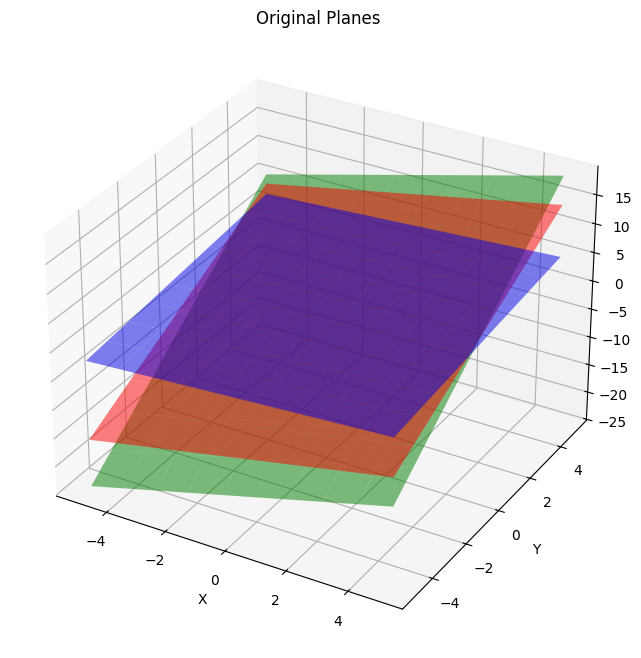

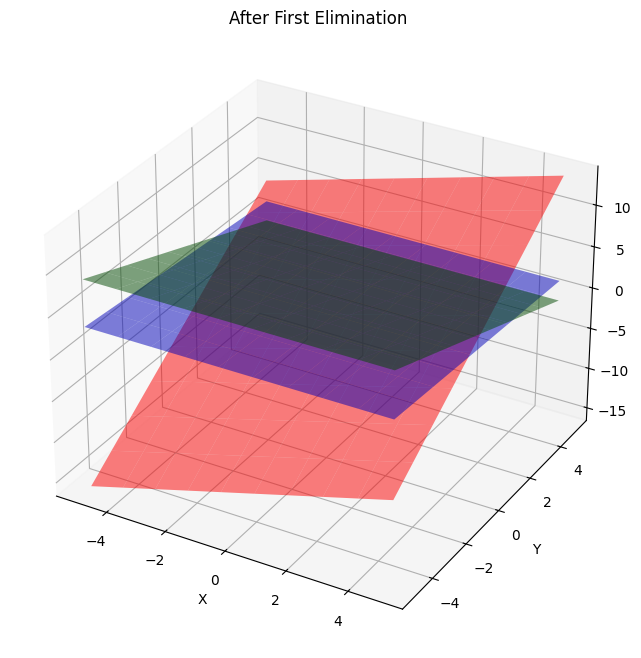

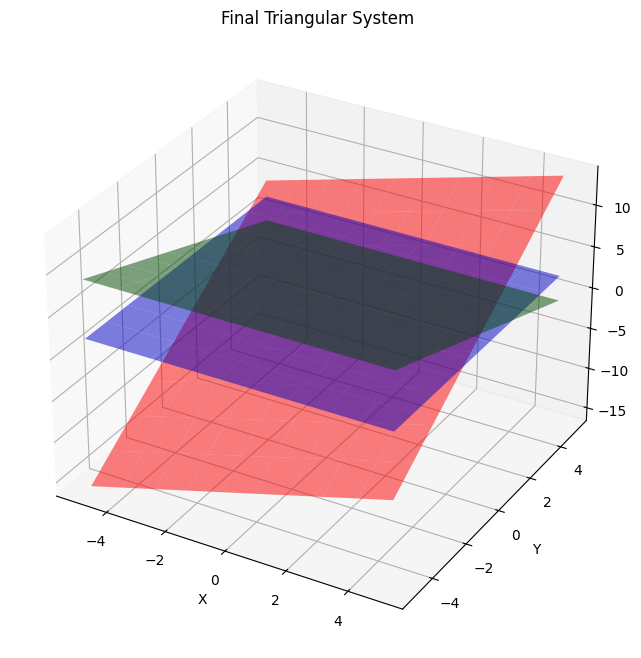

Solution (x, y, z): [-1  2  2]
Verification (Ax - b): [0 0 0]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_planes(equations, title, colors=['r', 'g', 'b']):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create grid for plotting
    x = np.linspace(-5, 5, 10)
    y = np.linspace(-5, 5, 10)
    X, Y = np.meshgrid(x, y)
    
    for i, (a, b, c, d) in enumerate(equations):
        # ax + by + cz = d => z = (d - ax - by)/c
        Z = (d - a*X - b*Y) / c
        ax.plot_surface(X, Y, Z, alpha=0.5, color=colors[i])
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    plt.show()

# Original system: Ax = b
A = np.array([
    [2, 4, -2],
    [4, 9, -3],
    [-2, -3, 7]
])
b = np.array([2, 8, 10])

# Original planes (Ax = b)
original_equations = [
    (2, 4, -2, 2),
    (4, 9, -3, 8),
    (-2, -3, 7, 10)
]

# After first elimination (step 1 and 2)
step1_equations = [
    (2, 4, -2, 2),
    (0, 1, 1, 4),
    (0, 1, 5, 12)
]

# Final triangular system (Ux = c)
final_equations = [
    (2, 4, -2, 2),
    (0, 1, 1, 4),
    (0, 0, 4, 8)
]

# Plot the planes at each stage
plot_planes(original_equations, "Original Planes")
plot_planes(step1_equations, "After First Elimination")
plot_planes(final_equations, "Final Triangular System")

# Solution verification
solution = np.array([-1, 2, 2])
print("Solution (x, y, z):", solution)
print("Verification (Ax - b):", np.dot(A, solution) - b)